# Classification

Here we use the representations created in notebook.2 in the classification

In [2]:
import sys
sys.path.append('../')
from classifier.classical_classifiers import RFClassifier,SVM
from utility.file_utility import FileUtility

## Example of Chron's Desease classifications

In [3]:
# CARGAR O ARQUIVO DE REPRESENTACIÓN K-MERS QUE MELLORES RESULTADOS DESE E OS RESULTADOS DE CLASIFICACIÓN REAIS

# X = matriz con datos:  (nº muestra, nº k-mers de la secuencia) Abundancia relativa del k-mer en la secuencia
# Y = lista de resultados reales:  (CD , not CD)
X=FileUtility.load_sparse_csr('../../crohns_disease/datasets/dataset_6-mers_rate_complete1359_seq_5000.npz')
Y=FileUtility.load_list('../../crohns_disease/datasets/labels_disease_complete1359.txt')

#print(X)

In [4]:
# ENTRENAR OS CLASIFICADORES E GARDAR OS RESULTADOS (results containing the best parameter, confusion matrix, best estimator)

#### Random Forest classifier
MRF = RFClassifier(X, Y)
MRF.tune_and_eval('../../crohns_disease/results/classification_results/classification_results')

#### Support Vector Machine classifier
MSVM = SVM(X, Y)
MSVM.tune_and_eval('../../crohns_disease/results/classification_results/classification_results')

/home/nuria/.local/share/virtualenvs/MicroPheno-F70P6HaP/lib/python3.5/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/nuria/.local/share/virtualenvs/MicroPheno-F70P6HaP/lib/python3.5/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Confusion matrix

In [5]:
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline 
from utility.visualization_utility import create_mat_plot

Populating the interactive namespace from numpy and matplotlib


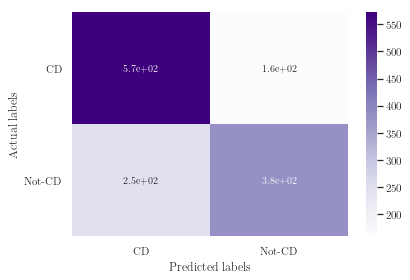

<Figure size 432x288 with 0 Axes>

In [7]:
# CREAR A MATRIZ DE CONFUSIÓN COS DATOS ALMACENADOS

#### Random Forest classifier
## load the results
[label_set, conf, best_score_, best_estimator_, cv_results_, best_params_, predictions]=FileUtility.load_obj('../../crohns_disease/results/classification_results/classification_results_RF.pickle')
label_set=[x.replace('_',' ') for x in label_set]

# Create the plot (Confusion matrix) and save it in a pdf
create_mat_plot(conf, label_set, '', '../../crohns_disease/results/classification_results/RF_result', 'Predicted labels' ,'Actual labels', cmap='Purples', filetype='pdf',font_s=8)

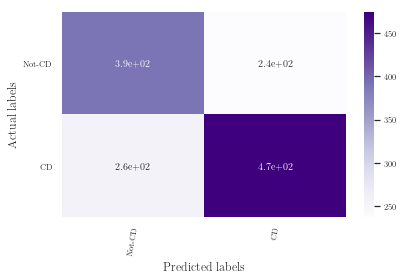

<Figure size 432x288 with 0 Axes>

In [10]:
#### Support Vector Machine classifier
[label_set, conf, best_score_, best_estimator_,cv_results_, best_params_, predictions]=FileUtility.load_obj('../../crohns_disease/results/classification_results/classification_results_SVM.pickle')
label_set=[x.replace('_',' ') for x in label_set]
create_mat_plot(conf, label_set, '', '../../crohns_disease/results/classification_results/SVM_result', 'Predicted labels' ,'Actual labels', cmap='Purples', filetype='pdf', rx=80, ry=0, font_s=15)


In [11]:
# PRUEBAS
print(best_params_)
print(best_core_)
print(best_estimator_)

{'C': 100}

## Oral bacteria

In [1]:
# Code for classification of oral bacteria data